<a href="https://colab.research.google.com/github/muhammadnaqeeb/AI-Lab-Work/blob/main/Lab_7_Activities_and_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 07
# **A-STAR Search**

> Muhammad Naqeeb

> fa20-bcs-012

> To: Mr. Qazi Zia

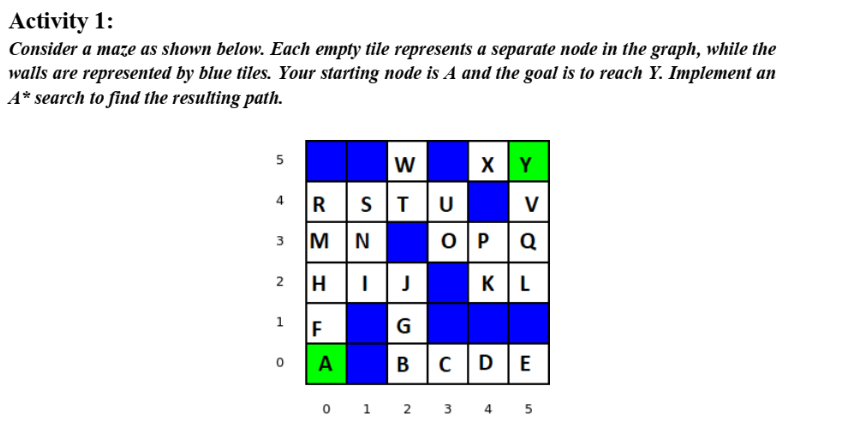

In [ ]:
import math

class Node:
    def __init__ (self, state, parent, actions, heuristic, totalCost ):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalCost = totalCost
        self.heuristic = heuristic
        
def findMin(frontier):
    #print('frontier: ', frontier) #######
    minValue = math.inf
    node = ''
    for i in frontier:
        if minValue > frontier[i][1]:
            minValue = frontier[i][1]
            node = i
    return node

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent
    while currentParent != None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent
    solution.reverse()
    return solution

def Astar():
    initialState = 'A'
    goalState = 'Y'
    
    graph = {'A': Node('A', None, [('F',1)], (0,0), 0),
             'B': Node('B', None, [('G',1), ('C',1)], (2,0), 0),
             'C': Node('C', None, [('B',1), ('D',1)], (3,0), 0),
             'D': Node('D', None, [('C',1), ('E',1)], (4,0), 0),
             'E': Node('E', None, [('D',1)], (5,0), 0),
             'F': Node('F', None, [('A',1), ('H',1)], (0,1), 0),
             'G': Node('G', None, [('B',1), ('J',1)], (2,1), 0),
             'H': Node('H', None, [('F',1), ('I',1), ('M',1)], (0,2), 0),
             'I': Node('I', None, [('H',1), ('J',1), ('N',1)], (1,2), 0),
             'J': Node('J', None, [('G',1), ('I',1)], (2,2), 0),
             'K': Node('K', None, [('L',1), ('P',1)], (4,2), 0),
             'L': Node('L', None, [('K',1), ('Q',1)], (5,2), 0),
             'M': Node('M', None, [('H',1), ('N',1), ('R',1)], (0,3), 0),
             'N': Node('N', None, [('I',1), ('M',1), ('S',1)], (1,3), 0),
             'O': Node('O', None, [('P',1), ('U',1)], (3,3), 0),
             'P': Node('P', None, [('O',1), ('Q',1)], (4,3), 0),
             'Q': Node('Q', None, [('L',1), ('P',1), ('V',1)], (5,3), 0),
             'R': Node('R', None, [('M',1), ('S',1)], (0,4), 0),
             'S': Node('S', None, [('N',1), ('R',1), ('T',1)], (1,4), 0),
             'T': Node('T', None, [('S',1), ('U',1), ('W',1)], (2,4), 0),
             'U': Node('U', None, [('O',1), ('T',1)], (3,4), 0),
             'V': Node('V', None, [('Q',1), ('Y',1)], (5,4), 0),
             'W': Node('W', None, [('T',1)], (2,5), 0),
             'X': Node('X', None, [('Y',1)], (4,5), 0),
             'Y': Node('Y', None, [('V',1), ('X',1)], (5,5), 0)}
    
    
    frontier = dict()
    
    heuristicCost = math.sqrt(((graph[goalState].heuristic[0]- graph[initialState].heuristic[0])**2)\
                              +((graph[goalState].heuristic[1]-graph[initialState].heuristic[1])**2))
    
    frontier[initialState] = (None, heuristicCost)
    explored = dict()
 
    
    while len(frontier) != 0:
        currentNode = findMin(frontier)
        print(currentNode)
        del frontier[currentNode]
        if graph[currentNode].state == goalState:
            return actionSequence(graph, initialState, goalState)
        
        heuristicCost = math.sqrt(((graph[goalState].heuristic[0]-graph[currentNode].heuristic[0])**2)\
                                  +((graph[goalState].heuristic[1]-graph[currentNode].heuristic[1])**2))
        currentCost = graph[currentNode].totalCost
        explored[currentNode] = (graph[currentNode].parent, heuristicCost+currentCost)
        #print('explored: ', explored) ############
        for child in graph[currentNode].actions:
            currentCost = child[1] + graph[currentNode].totalCost
            heuristicCost = math.sqrt(((graph[goalState].heuristic[0]-graph[child[0]].heuristic[0])**2)\
                                      +((graph[goalState].heuristic[1]-graph[child[0]].heuristic[1])**2))
            
            if child[0] in explored:
                if graph[child[0]].parent == currentNode or child[0]==initialState or explored[child[0]][1] <= currentCost + heuristicCost:
                    continue
            if child[0] not in frontier:
                graph[child[0]].parent = currentNode
                graph[child[0]].totalCost = currentCost
                frontier[child[0]] = (graph[child[0]].parent, currentCost + heuristicCost)
            else:
                if frontier[child[0]][1] < currentCost + heuristicCost:
                    graph[child[0]].parent = frontier[child[0]][0]
                    graph[child[0]].totalCost = frontier[child[0]][1] - heuristicCost
                else:
                    frontier[child[0]] = (currentNode, currentCost + heuristicCost)
                    graph[child[0]].parent = frontier[child[0]][0]
                    graph[child[0]].totalCost = currentCost
              

sol = Astar()
print(sol)

A
F
H
I
J
M
N
R
S
T
U
G
W
O
P
B
Q
V
Y
['A', 'F', 'H', 'M', 'R', 'S', 'T', 'U', 'O', 'P', 'Q', 'V', 'Y']
